In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math

#### Быстрое преобразование Фурье

In [2]:
N = 1024
# заранее считаем значения коэффициентов
c_array = []
for i in range(1, N + 1):
    c_array.append(np.exp((2*np.pi/i)*1j))
c_array = np.array(c_array, dtype=np.complex128)

In [3]:
def FFT(array):
    # выбираем из массива коэффициент для текущего размера массива
    c_main = c_array[len(array) - 1]
    # если уже дошли до матрицы 2x2
    if len(array) == 2:
        return [array[0] + array[1], array[0] - array[1]]

    # делим на два подмассива - с четными и нечетными индексами и находим их преобразование фурье
    odd_array = FFT(array[1::2])
    even_array =  FFT(array[::2])

    # считаем коэффициенты в диагональной матрице
    c_array_temp = []
    for i in range(1, len(odd_array) + 1):
        c_array_temp.append(c_main**(i - 1))
    c_array_temp = np.array(c_array_temp, dtype=np.complex128)

    # объединяем подмассивы в один
    return np.hstack((even_array  + c_array_temp*odd_array, even_array  - c_array_temp*odd_array))

In [4]:
def draw_results(x, f, lim_x_r, lim_y_r, lim_x_l, lim_y_l, lim_x_l_w, lim_x_r_w, lim_y_l_w, lim_y_r_w):
    fig = plt.figure(figsize=(10,5))
    ax = fig.subplots(1, 2)
    # пределы графиков
    ax[0].set_ylim(lim_y_r, lim_y_l)
    ax[0].set_xlim(lim_x_r, lim_x_l)

    # сетка частот
    t = x[1] - x[0]
    w_g = 2*np.pi/t
    dw = w_g/N
    def w_j(j):
        if (0 <= j <= N/2):
            return j*dw
        else:
            return j*dw - w_g

    w = []
    for i in range(N):
        w.append(w_j(i))
    w = np.array(w) 
    
    ax[0].plot(x, f, color = "orange")
    ax[0].set_xlabel("Исходная функция")
    ax[1].plot(w, abs(FFT(f)), color = "green")
    ax[1].set_xlabel("Преобразование Фурье")
    ax[1].set_xlim(lim_x_l_w, lim_x_r_w)
    ax[1].set_ylim(lim_y_l_w, lim_y_r_w)

    ax[0].minorticks_on()
    ax[0].grid(True, which='both')
    ax[0].grid(which='minor', color='gray', linestyle=':')
    ax[1].minorticks_on()
    ax[1].grid(True, which='both')
    ax[1].grid(which='minor', color='gray', linestyle=':')
    plt.legend()

##### f(x) = 3cos(2x) + sin(5x)

d:\Anaconda\envs\myenv\lib\site-packages\matplotlib\cbook\__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


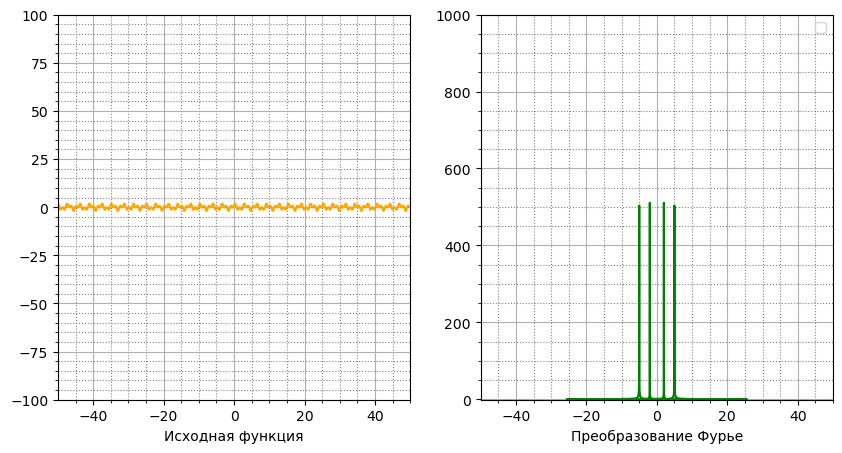

In [5]:
x = np.linspace(-20*np.pi, 20*np.pi, N, dtype=np.complex128)
f = np.array(np.cos(2*x) + np.sin(5*x), dtype=np.complex128)
draw_results(x, f, -50, -100, 50, 100, -50, 50, -1, 1000)

##### f(x) = sin(x)/x

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


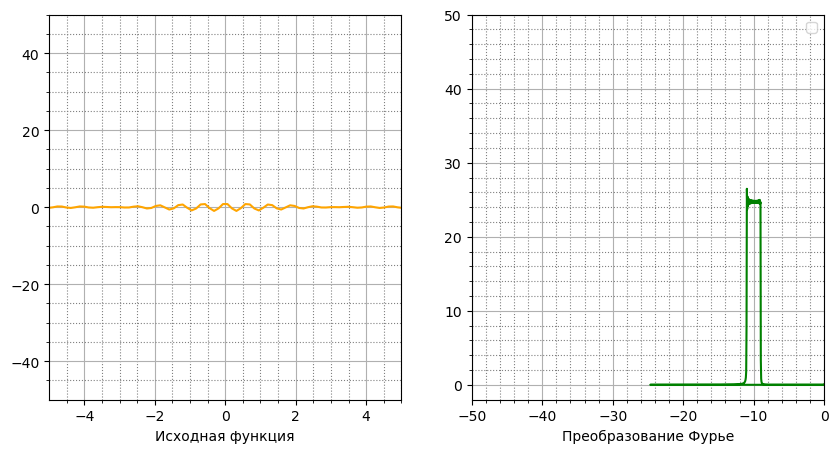

In [6]:
x = np.linspace(-65, 65, N, dtype=np.complex128)
f = np.array(np.sin(x)*np.exp(10j*x)/x, dtype=np.complex128)
draw_results(x, f, -5, -50, 5, 50, -50, 0, -2, 50)

##### f(x) = np.exp(-x)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


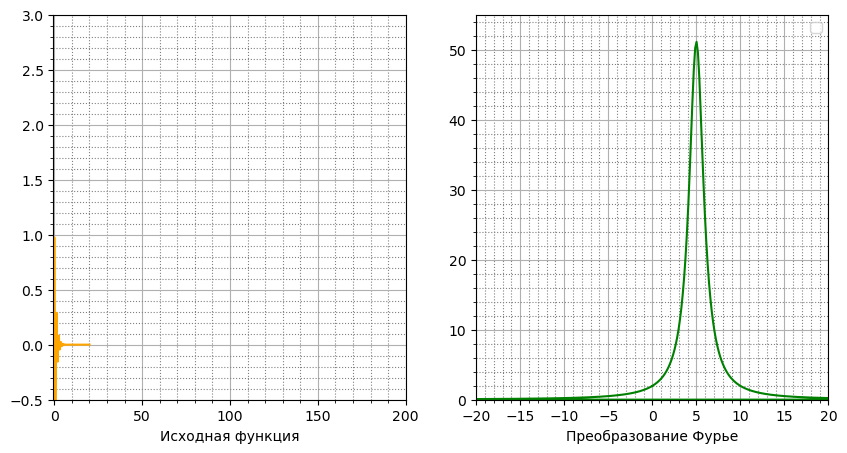

In [7]:
x = np.linspace(-20, 20, N, dtype=np.complex128)
f = np.array(np.exp(-abs(x)-5j*x), dtype=np.complex128)
draw_results(x, f, -0.5, -0.5, 200, 3, -20, 20, 0, 55)